In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, log_loss, confusion_matrix


In [4]:
max_len = 2048

def crop_exceed_data(data):
    if len(data) <= max_len:
        return data
    return data[0: max_len]


def get_bytes_array(data):
    """
    int to bytes array
    :param data:
    :return:
    """
    bytes_data = bytes(map(int, data.split(",")))
    bytes_data = crop_exceed_data(bytes_data)
    return [int(single_byte) for single_byte in bytes_data]

In [5]:
train_x = pd.read_csv("./input/1_train.csv", header=None, sep="|", names=['row_data'], error_bad_lines=False)
tmp_v = train_x["row_data"].apply(lambda x: get_bytes_array(x))
train_x = pd.DataFrame(tmp_v.tolist(), dtype=float)
train_y = pd.read_csv("./input/1_train_label.csv", header=None, error_bad_lines=False)
del tmp_v
print('Shape of the train_x data: ', train_x.shape)
print('Shape of the train_y data: ', train_y.shape)

Shape of the train_x data:  (113133, 2048)
Shape of the train_y data:  (113133, 1)


<module 'matplotlib.pyplot' from '/home/zhaoqi/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

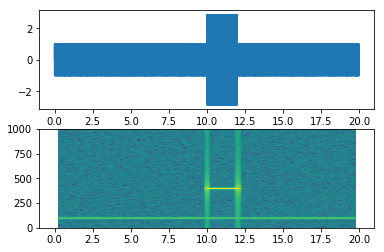

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(5242)


dt = 0.0005
t = np.arange(0.0, 20.0, dt)
s1 = np.sin(2 * np.pi * 100 * t)
s2 = 2 * np.sin(2 * np.pi * 400 * t)

# create a transient "chirp"
mask = np.where(np.logical_and(t > 10, t < 12), 1.0, 0.0)
s2 = s2 * mask

# add some noise into the mix
# nse = 0.01 * np.random.random(size=len(t))

x = s1 + s2 + nse  # the signal
NFFT = 1024       # the length of the windowing segments
Fs = int(1.0 / dt)  # the sampling frequency

# Pxx is the segments x freqs array of instantaneous power, freqs is
# the frequency vector, bins are the centers of the time bins in which
# the power is computed, and im is the matplotlib.image.AxesImage
# instance

ax1 = plt.subplot(211)
plt.plot(t, x)
plt.subplot(212, sharex=ax1)
Pxx, freqs, bins, im = plt.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=900)
plt

In [10]:
NFFT

1024